In [1]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from tensorflow import keras

The Fashion MNIST data is available directly in the tf.keras datasets API. You load it like this:

In [2]:
mnist = tf.keras.datasets.fashion_mnist

In [21]:
(training_images ,training_labels),(test_images, test_images_lables) = mnist.load_data()

In [23]:
len(test_images_lables)

10000

In [24]:
set(test_images_lables) # 10 Class

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [12]:
np.set_printoptions(linewidth=150)
print(training_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 22

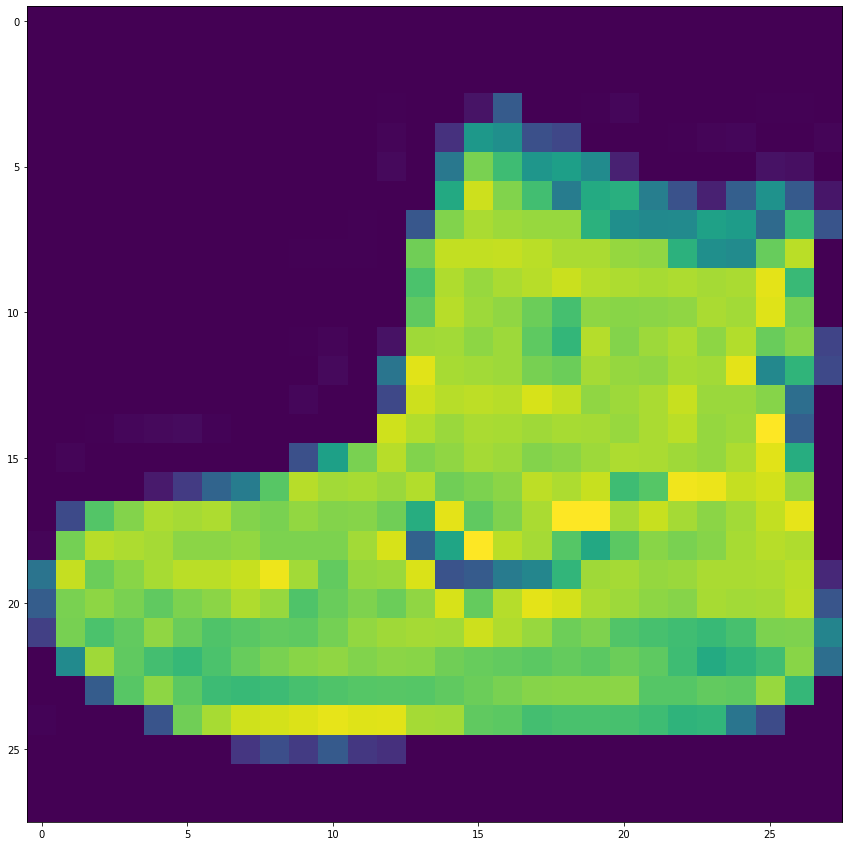

In [13]:
fist_train_image = training_images[0]
plt.figure(figsize=(30,15))
plt.imshow(fist_train_image)

In [10]:
print(training_labels[0])

9


In [6]:
fist_train_image.shape

(28, 28)

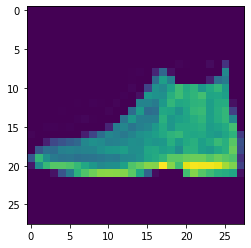

In [7]:
fist_test_image = test_images[0]
plt.imshow(fist_test_image)

In [8]:
fist_test_image.shape

(28, 28)

In [16]:
np.min(training_images[0]),np.max(training_images[0])

(0, 255)

In [17]:
training_images  = training_images / 255.0  # Data Normilization 
test_images = test_images / 255.0

9
[[0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         

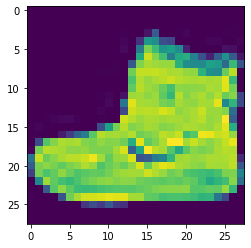

In [18]:
np.set_printoptions(linewidth=150)
plt.imshow(training_images[0])
print(training_labels[0])
print(training_images[0])

In [19]:
np.min(training_images[0]),np.max(training_images[0]) # probability 

(0.0, 1.0)

In [20]:
28*28 # one image values i am passing 784 input neurons

784

In [25]:
model = keras.models.Sequential([tf.keras.layers.Flatten(),
                                tf.keras.layers.Dense(128,activation=tf.nn.relu), # Relu [X >0 and 1 to inf]
                                 tf.keras.layers.Dense(10,activation=tf.nn.softmax)
                                ])

In [26]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [30]:
model.fit(training_images,training_labels,epochs=100)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5325 - accuracy: 0.8061
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5311 - accuracy: 0.8082
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5245 - accuracy: 0.8082
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5273 - accuracy: 0.8079
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5261 - accuracy: 0.8066


In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (32, 784)                 0         
_________________________________________________________________
dense (Dense)                (32, 128)                 100480    
_________________________________________________________________
dense_1 (Dense)              (32, 10)                  1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.evaluate(test_images, test_images_lables)

313/313 [==============================] - 1s 2ms/step - loss: 0.6033 - accuracy: 0.7915


[0.6033002734184265, 0.7914999723434448]

In [34]:
classifications = model.predict(test_images)

print(classifications[0])

[4.6359717e-22 4.0860304e-14 0.0000000e+00 1.9380656e-17 0.0000000e+00 7.7183358e-02 0.0000000e+00 1.0848328e-01 5.2033968e-17 8.1433332e-01]


In [37]:
print(test_images_lables[0])

9


In [59]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if(logs.get('loss')<0.1):
            print("\nReached to 80% accuracy so i am Canceling Training Process")
            self.model.stop_training = True

In [60]:
callbacks = myCallback()

In [61]:
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0

In [62]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(256, activation=tf.nn.relu),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [63]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(training_images, 
          training_labels, 
          epochs=5, 
          callbacks=[callbacks])

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4922 - accuracy: 0.8224
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3685 - accuracy: 0.8669
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3326 - accuracy: 0.8785
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3099 - accuracy: 0.8851
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2891 - accuracy: 0.8923
